In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
print(coordinates)

[(-68.71789256565502, -178.6889497899927), (47.51099779353592, 27.699149609672844), (14.666300637863202, -61.390907514925715), (24.605597157724148, 24.403904583783316), (39.79840464328262, 130.52958157665637), (24.944104751225836, 93.94803898473339), (-2.9643094776505734, 156.2120673417915), (-86.28466221984276, 92.18797557873552), (-0.5437348561844431, 102.41099197907135), (-48.75168608441371, -157.24552031713958), (83.15549141821845, -83.96795500344246), (71.9147526174948, -24.921721387108562), (57.80741895458601, -43.32217992360836), (48.807768684415834, -114.61772197574024), (-69.12246465000928, 0.15652728996528253), (12.138922086203195, -52.075167321083896), (48.66985693682673, 84.64695442155949), (-44.78789383091403, 138.8322440611471), (7.997437752587672, -34.61273766485141), (-43.98354257093695, -42.05622236603324), (-7.562157533858098, -19.642256385348247), (-81.54553793882971, -84.90688008240343), (-20.63451809480074, -12.77212802195163), (-84.88362201316531, 173.380532673657

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf71dd124e4ba413cd78e7125dd8affb


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf71dd124e4ba413cd78e7125dd8affb&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":58.68,"feels_like":55.24,"temp_min":57,"temp_max":60.01,"pressure":1011,"humidity":21},"visibility":10000,"wind":{"speed":18.41,"deg":320,"gust":28.77},"clouds":{"all":5},"dt":1617570250,"sys":{"type":1,"id":4967,"country":"US","sunrise":1617531658,"sunset":1617577975},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 58.68,
  'feels_like': 55.24,
  'temp_min': 57,
  'temp_max': 60.01,
  'pressure': 1011,
  'humidity': 21},
 'visibility': 10000,
 'wind': {'speed': 18.41, 'deg': 320, 'gust': 28.77},
 'clouds': {'all': 5},
 'dt': 1617570250,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1617531658,
  'sunset': 1617577975},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 58.68,
  'feels_like': 55.24,
  'temp_min': 57,
  'temp_max': 60.01,
  'pressure': 1011,
  'humidity': 21},
 'visibility': 10000,
 'wind': {'speed': 18.41, 'deg': 320, 'gust': 28.77},
 'clouds': {'all': 5},
 'dt': 1617570250,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1617531658,
  'sunset': 1617577975},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data["coord"]["lat"]

42.3584

In [18]:
boston_data["main"]["temp_max"]

60.01

In [19]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 60.01 21 5 18.41


In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-04 21:04:10'

In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | vaini
Processing Record 2 of Set 12 | falesti
Processing Record 3 of Set 12 | saint-pierre
Processing Record 4 of Set 12 | jalu
Processing Record 5 of Set 12 | khasan
Processing Record 6 of Set 12 | imphal
Processing Record 7 of Set 12 | kieta
Processing Record 8 of Set 12 | albany
Processing Record 9 of Set 12 | mendahara
City not found. Skipping...
Processing Record 10 of Set 12 | mataura
Processing Record 11 of Set 12 | qaanaaq
Processing Record 12 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 12 | nanortalik
Processing Record 14 of Set 12 | whitefish
Processing Record 15 of Set 12 | hermanus
Processing Record 16 of Set 12 | mana
Processing Record 17 of Set 12 | kurchum
Processing Record 18 of Set 12 | portland
Processing Record 19 of Set 12 | itarema
Processing Record 20 of Set 12 | chuy
Processing Record 21 of Set 12 | georgetown
Processing Record 22 of Set 12 | ushuaia
Processing Record 23 of Set 12 | jamestow

Processing Record 34 of Set 15 | fez
Processing Record 35 of Set 15 | iwanai
Processing Record 36 of Set 15 | bristol
Processing Record 37 of Set 15 | dubai
Processing Record 38 of Set 15 | mendi
Processing Record 39 of Set 15 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 15 | jacmel
Processing Record 41 of Set 15 | te anau
Processing Record 42 of Set 15 | benguela
Processing Record 43 of Set 15 | marin
Processing Record 44 of Set 15 | isangel
Processing Record 45 of Set 15 | burica
City not found. Skipping...
Processing Record 46 of Set 15 | komsomolskiy
Processing Record 47 of Set 15 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 15 | olafsvik
Processing Record 49 of Set 15 | sinnamary
Processing Record 50 of Set 15 | naze
Processing Record 1 of Set 16 | sulechow
Processing Record 2 of Set 16 | ban nahin
Processing Record 3 of Set 16 | sioux lookout
Processing Record 4 of Set 16 | castricum
Processing Record 5 of Set 16 | srivardhan
Process

Processing Record 15 of Set 19 | castlegar
Processing Record 16 of Set 19 | naruto
Processing Record 17 of Set 19 | san cristobal
Processing Record 18 of Set 19 | lahuachaca
Processing Record 19 of Set 19 | luocheng
Processing Record 20 of Set 19 | muros
Processing Record 21 of Set 19 | umzimvubu
City not found. Skipping...
Processing Record 22 of Set 19 | zavyalovo
Processing Record 23 of Set 19 | rio claro
Processing Record 24 of Set 19 | tabou
Processing Record 25 of Set 19 | manali
Processing Record 26 of Set 19 | ixtapa
Processing Record 27 of Set 19 | hirara
Processing Record 28 of Set 19 | lorengau
Processing Record 29 of Set 19 | farrukhnagar
Processing Record 30 of Set 19 | scottsboro
Processing Record 31 of Set 19 | guamuchil
Processing Record 32 of Set 19 | katastarion
Processing Record 33 of Set 19 | manavalakurichi
Processing Record 34 of Set 19 | mehamn
Processing Record 35 of Set 19 | weiser
Processing Record 36 of Set 19 | chernyakhiv
Processing Record 37 of Set 19 | ha

Processing Record 6 of Set 23 | milton
Processing Record 7 of Set 23 | licheng
Processing Record 8 of Set 23 | berlevag
Processing Record 9 of Set 23 | bulgan
Processing Record 10 of Set 23 | egvekinot
Processing Record 11 of Set 23 | worthington
Processing Record 12 of Set 23 | tervel
Processing Record 13 of Set 23 | kopervik
Processing Record 14 of Set 23 | grand centre
City not found. Skipping...
Processing Record 15 of Set 23 | havoysund
Processing Record 16 of Set 23 | strezhevoy
Processing Record 17 of Set 23 | vila
Processing Record 18 of Set 23 | parabel
Processing Record 19 of Set 23 | marystown
Processing Record 20 of Set 23 | idritsa
Processing Record 21 of Set 23 | cabedelo
Processing Record 22 of Set 23 | novaya zaimka
Processing Record 23 of Set 23 | manzil tamim
City not found. Skipping...
Processing Record 24 of Set 23 | wilmington
Processing Record 25 of Set 23 | exokhi
City not found. Skipping...
Processing Record 26 of Set 23 | tinskoy
Processing Record 27 of Set 23 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,77.00,83,20,9.22,TO,2021-04-04 21:08:26
1,Falesti,47.5736,27.7092,37.99,75,4,4.00,MD,2021-04-04 21:08:26
2,Saint-Pierre,-21.3393,55.4781,77.00,78,0,5.75,RE,2021-04-04 21:08:26
3,Jalu,29.0331,21.5482,72.59,10,0,11.45,LY,2021-04-04 21:08:26
4,Khasan,42.4308,130.6434,37.67,54,0,4.38,RU,2021-04-04 21:08:27
5,Imphal,24.8167,93.9500,58.41,32,12,2.71,IN,2021-04-04 21:08:27
6,Kieta,-6.2167,155.6333,80.51,80,99,3.24,PG,2021-04-04 21:08:27
7,Albany,42.6001,-73.9662,60.01,27,51,4.00,US,2021-04-04 21:03:28
8,Mataura,-46.1927,168.8643,53.01,90,98,18.99,NZ,2021-04-04 21:08:27
9,Qaanaaq,77.4840,-69.3632,-12.10,67,26,6.29,GL,2021-04-04 21:08:28


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/04/21'

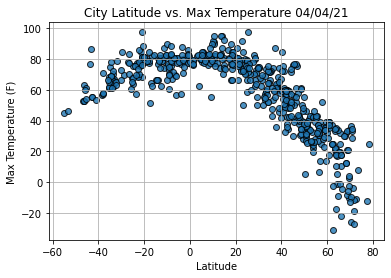

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

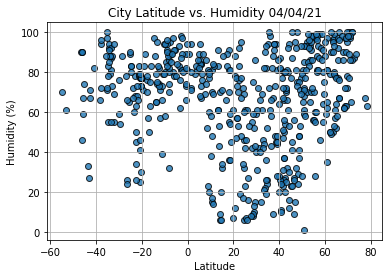

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

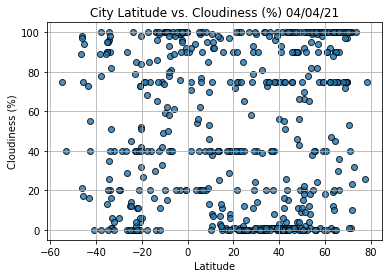

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

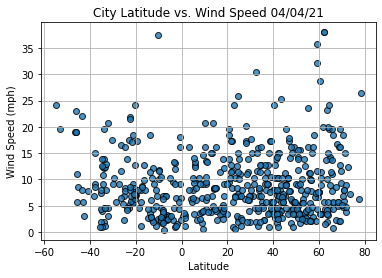

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [35]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [36]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

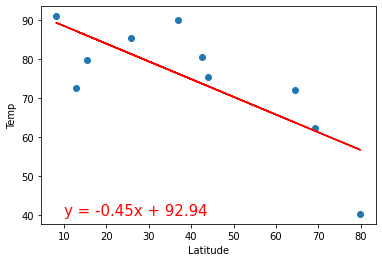

In [37]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

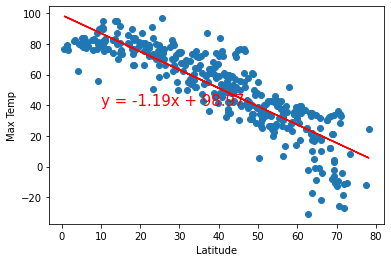

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

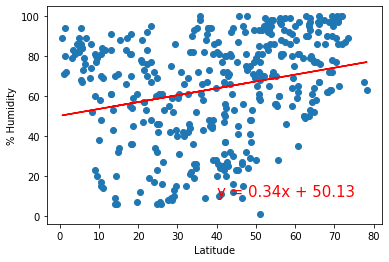

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

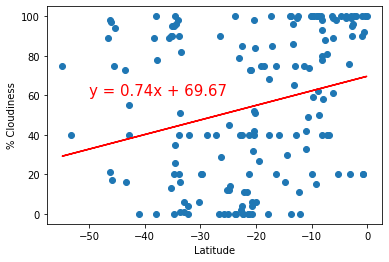

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-50,60))

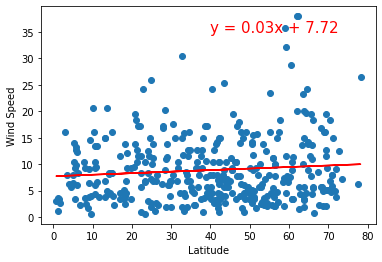

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

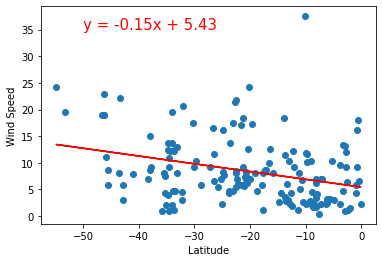

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))